# Keras TF 2.0 - Classification Project

There are 3 models that we will be demostrating.

+ [Example One: Choosing too many epochs and overfitting!](#overfit)
+ [Example Two: Early Stopping](#earlystop)
+ [Example Three: Adding in DropOut Layers](#dropout)

----

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/cancer_classification.csv')

In [3]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


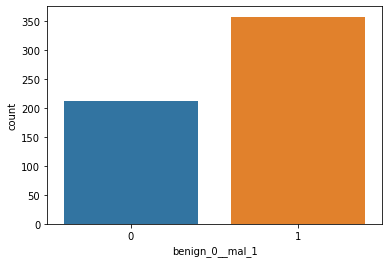

In [6]:
sns.countplot(data=df,x='benign_0__mal_1');

### Check the correlation

In [7]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

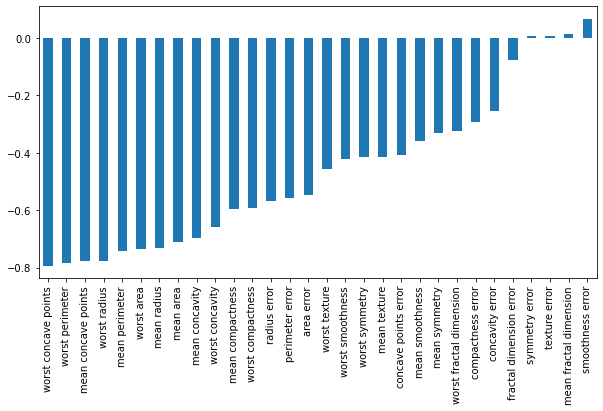

In [8]:
plt.figure(figsize=(10, 5))
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar');

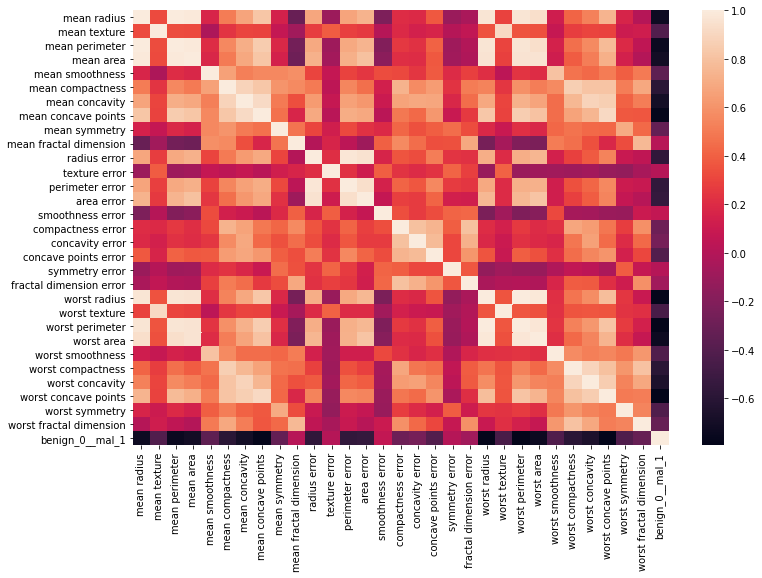

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr());

----

# Train Test Split

In [12]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Scaling Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
X_train.shape # we have 30 features

(426, 30)

In [20]:
model = Sequential()

In [23]:
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification => Sigmoid
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# Training the Model 

# <a name='overfit'>Example One: Choosing too many epochs and overfitting!</a>

In [24]:
model.fit(x=X_train, y=y_train, 
             epochs=600,
             validation_data=(X_test, y_test),
             verbose=1)

Epoch 1/600
14/14 [==============================] - 0s 34ms/step - loss: 0.6765 - val_loss: 0.6549
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6360 - val_loss: 0.6144
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5950 - val_loss: 0.5718
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5503 - val_loss: 0.5261
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5079 - val_loss: 0.4840
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4640 - val_loss: 0.4394
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4211 - val_loss: 0.3976
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3816 - val_loss: 0.3587
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3477 - val_loss: 0.3245
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3151 - val_loss: 0.2907
Epoch 11

14/14 [==============================] - 0s 9ms/step - loss: 0.0514 - val_loss: 0.1120
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0518 - val_loss: 0.1195
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0535 - val_loss: 0.1091
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0564 - val_loss: 0.1240
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0531 - val_loss: 0.1158
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0505 - val_loss: 0.1172
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0509 - val_loss: 0.1106
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0515 - val_loss: 0.1188
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0493 - val_loss: 0.1120
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0515 - val_loss: 0.1175
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0421 - val_loss: 0.1278
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0421 - val_loss: 0.1384
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0422 - val_loss: 0.1300
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.1317
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.1375
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0379 - val_loss: 0.1266
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.1389
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.1314
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0375 - val_loss: 0.1322
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0384 - val_loss: 0.1353
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0298 - val_loss: 0.1437
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.1666
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0296 - val_loss: 0.1454
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0291 - val_loss: 0.1622
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.1409
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0305 - val_loss: 0.1538
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.1474
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.1599
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.1447
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0295 - val_loss: 0.1570
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.1609
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0236 - val_loss: 0.1603
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.1667
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.1833
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0281 - val_loss: 0.1538
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0257 - val_loss: 0.1735
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.1504
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0272 - val_loss: 0.1650
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0216 - val_loss: 0.1625
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.1695
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.1923
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.1900
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.1821
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.1868
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.2007
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0170 - val_loss: 0.1867
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.1897
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.1858
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.2025
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.1907
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0170 - val_loss: 0.2898
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.2125
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.2195
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.2358
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.2230
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.2167
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.2482
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.2213
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 0.2401
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.2166
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.2602
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.2496
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.2557
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.2537
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.2611
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.2603
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.2647
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.2734
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.2620
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.2684
Epoc

In [25]:
losses = pd.DataFrame(model.history.history)

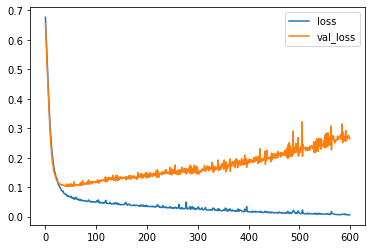

In [26]:
losses.plot();

This is the perfect example of overfitting. We can see that initally, loss is starting to decrease on validation.

However it get spiked up after a certain point in time of few epoches.

-----

# <a name='earlystop'>Example Two: Early Stopping</a>

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

+ **`monitor`**: Quantity to be monitored. Which we are monitoring such as `val_loss` or `accuracy`.
+ **`mode`**: if we are monitoring loss, we want to minimize it. So we use `min`. For the case of accuracy, we want to maximize it. So we use `max`
+ **` patience`**: Number of epochs with no improvement after which training will be stopped. It is a hard stopping.

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification => Sigmoid
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
#  help(EarlyStopping)

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', 
                                                  mode='min',
                                                  patience=25,
                                                  verbose=1)

In [34]:
model.fit(x=X_train, y=y_train,
             validation_data=(X_test, y_test),
             epochs=600,
             callbacks=[early_stopping],
             verbose=1)

Epoch 1/600
14/14 [==============================] - 0s 29ms/step - loss: 0.7097 - val_loss: 0.6804
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6748 - val_loss: 0.6584
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6517 - val_loss: 0.6366
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6283 - val_loss: 0.6116
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6014 - val_loss: 0.5769
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5620 - val_loss: 0.5379
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5218 - val_loss: 0.4925
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4784 - val_loss: 0.4477
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4327 - val_loss: 0.4062
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3929 - val_loss: 0.3613
Epoch 11

In [35]:
losses = pd.DataFrame(model.history.history)

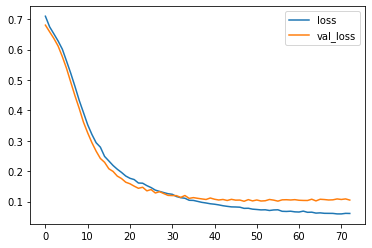

In [36]:
losses.plot();

This is the plot that we want to see. Both loss and val_loss are beginning to decrease.

------

# <a name='dropout'>Example Three: Adding in DropOut Layers</a>

**Early Stopping**

- Keras can automatically stop training based on a loss condition on the validation data passed during the model.fit call.

**Dropout Layers**

- can be added to layers to "turn off" neurons during training to prevent overfitting.

- each dropout layer will "drop" a user-defined percentage of neuron units in the previous layer every batch.

**We can define by `model.add(Dropout(0 ~ 1))`: values can between 0 and 1.**

0 percent , 1 mean 100% of neurons.

In [37]:
from tensorflow.keras.layers import Dropout

In [39]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) # 50% of randomly selected neurons for each batch (1 entire epoch triaining) will be truned off

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
# in combination with early stopping callbacks
early_stopping = EarlyStopping(monitor='val_loss',
                                                  mode='min',
                                                  patience=25,
                                                  verbose=1)

In [41]:
model.fit(x=X_train, y=y_train,
             validation_data=(X_test, y_test),
             callbacks=[early_stopping],
             epochs=600)

Epoch 1/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6931 - val_loss: 0.6675
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6685 - val_loss: 0.6503
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6499 - val_loss: 0.6289
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6359 - val_loss: 0.6076
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6001 - val_loss: 0.5792
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5845 - val_loss: 0.5454
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5740 - val_loss: 0.5215
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5369 - val_loss: 0.4953
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5524 - val_loss: 0.4779
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5163 - val_loss: 0.4585
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.1343 - val_loss: 0.0935
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1232 - val_loss: 0.0917
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1213 - val_loss: 0.0982
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1328 - val_loss: 0.1003
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1236 - val_loss: 0.0999
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1423 - val_loss: 0.0990
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1288 - val_loss: 0.0992
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1269 - val_loss: 0.0962
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1141 - val_loss: 0.1039
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1048 - val_loss: 0.0928
Epoch 93/600


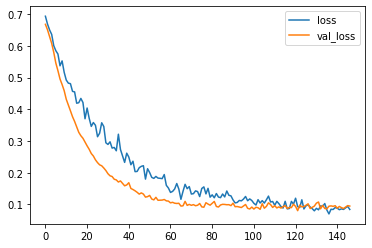

In [43]:
losses = pd.DataFrame(model.history.history)

losses.plot();

This is great. Both loss and val_loss are flattening out at the same time.

------
-----

# Model Evaluation

In [51]:
predictions = model.predict_classes(X_test)

predictions[:5]

array([[1],
       [1],
       [1],
       [0],
       [1]])

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [58]:
confusion_matrix(y_test, predictions)

array([[54,  1],
       [ 3, 85]], dtype=int64)

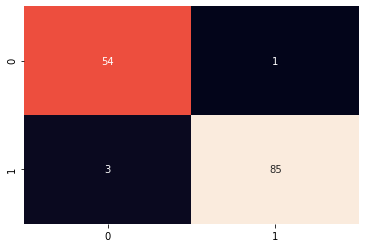

In [63]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);

-----